In [1]:
    import pandas as pd
    import matplotlib
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.tree import export_graphviz
    import graphviz

    matplotlib.rc('font',family='Malgun Gothic')
    matplotlib.rc('font',family='NanumGothic')

    import os
    os.environ["PATH"]+=os.pathsep +os.pathsep+"C:/Program Files (x86)/Graphviz2.38/bin/"

In [2]:
df_raw = pd.read_csv("D:\Study\새 폴더\Big Data 분석\Concrete.csv",encoding="euc_kr",engine="python")
df_raw

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [3]:
df_raw_y=df_raw["CONCRETE_COMPRESSIVE_STRENGTH"]
df_raw_x=df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH",axis=1,inplace=False)

In [4]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (721, 8)
train data Y size : (721,)
test data X size : (309, 8)
test data Y size : (309,)


In [5]:
df_train_x,df_validation_x,df_train_y,df_validation_y=train_test_split(df_train_x,df_train_y,test_size=0.428,random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("Validation data X size : {}".format(df_validation_x.shape))
print("Validation data Y size : {}".format(df_validation_y.shape))

train data X size : (412, 8)
train data Y size : (412,)
Validation data X size : (309, 8)
Validation data Y size : (309,)


- train 데이터 412건, validation 데이터 309건, test 데이터 309건

In [6]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x,df_train_y)

print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on validation set:{:.3f}".format(gb_uncustomized.score(df_validation_x,df_validation_y)))

Score on training set:0.957
Score on validation set:0.837


- test 데이터의 설명력이 낮음 : 과대적합

In [7]:
gb_uncustomized

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=1234, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

- estimators : 트리의 수 변경에 따른 모델성능

In [8]:
train_score=[];validation_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=v_n_estimators,)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    
df_score_n=pd.DataFrame()
df_score_n["Estimators"]=para_n_tree
df_score_n["TrainScore"]=train_score
df_score_n["Validation"]=validation_score

In [9]:
df_score_n.round(3)

,Estimators,TrainScore,Validation
0,10,0.666,0.565
1,20,0.827,0.718
2,30,0.885,0.781
3,40,0.911,0.804
4,50,0.926,0.814
5,60,0.936,0.823
6,70,0.943,0.830
7,80,0.948,0.833
8,90,0.953,0.837
9,100,0.957,0.837


c:\users\cross\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


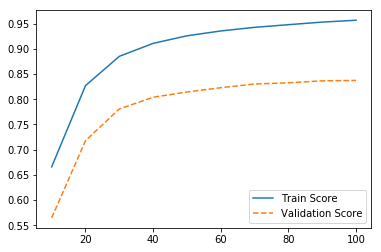

In [10]:
plt.plot(para_n_tree,train_score,linestyle="-",label="Train Score")
plt.plot(para_n_tree,validation_score,linestyle="--",label="Validation Score")
plt.legend()

n_estimatoes =20개 적절

## min_samples_leaf : 입사귀 노드의 자료 수 지정

In [11]:
train_score=[];validation_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,30)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=20,
                              min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    
df_score_leaf=pd.DataFrame()
df_score_leaf["MinSamplesLeaf"]=para_leaf
df_score_leaf["TrainScore"]=train_score
df_score_leaf["Validation"]=validation_score

In [12]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,Validation
0,1,0.827,0.718
1,2,0.827,0.718
2,3,0.826,0.720
3,4,0.828,0.723
4,5,0.828,0.722
5,6,0.827,0.722
6,7,0.825,0.719
7,8,0.825,0.717
8,9,0.823,0.723
9,10,0.821,0.714


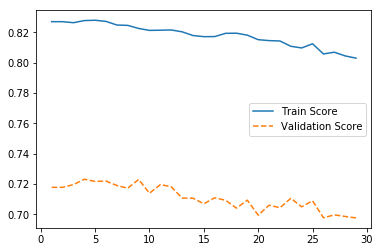

In [13]:
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- min_samples_leaf=9개 적절

## min_samples_split: 분리 노드의 최소 자료 수 변경에 따른 모델 성능

In [14]:
train_score=[];validation_score=[]
para_split=[n_split*2 for n_split in range(2,51)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=20,min_samples_leaf=9,
                              min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    
df_score_split=pd.DataFrame()
df_score_split["MinSampleSplit"]=para_split
df_score_split["TrainScore"]=train_score
df_score_split["Validation"]=validation_score

In [15]:
df_score_split.round(3)

,MinSampleSplit,TrainScore,Validation
0,4,0.823,0.723
1,6,0.823,0.723
2,8,0.823,0.723
3,10,0.823,0.723
4,12,0.823,0.723
5,14,0.823,0.723
6,16,0.823,0.723
7,18,0.823,0.723
8,20,0.822,0.723
9,22,0.822,0.723


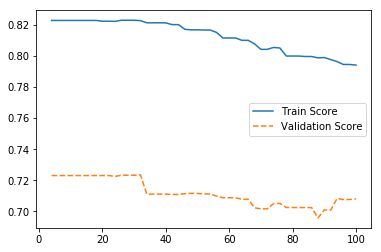

In [16]:
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- min_samples_split = 32개 적절

## max_depth : 최대 깊이 변경에 따른 설명력 변화

In [17]:
train_score=[];validation_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=20,min_samples_leaf=9,min_samples_split=32,
                              max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    
df_score_depth=pd.DataFrame()
df_score_depth["Depth"]=para_depth
df_score_depth["TrainScore"]=train_score
df_score_depth["Validation"]=validation_score

In [18]:
df_score_depth.round(3)

,Depth,TrainScore,Validation
0,1,0.558,0.462
1,2,0.734,0.638
2,3,0.823,0.724
3,4,0.870,0.758
4,5,0.897,0.776
5,6,0.908,0.786
6,7,0.912,0.789
7,8,0.913,0.787
8,9,0.915,0.789
9,10,0.915,0.787


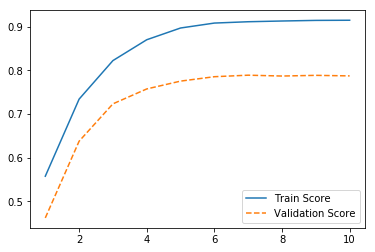

In [19]:
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- max_depth = 4개 적절

## learning_rate: 학습률 변경 시 모델의 설명력 변화

In [20]:
train_score=[];validation_score=[]
para_lr=[lr*0.1 for lr in range(1,10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234,n_estimators=20,min_samples_leaf=9,min_samples_split=32,
                              max_depth=4,learning_rate =v_learning_rate )
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    validation_score.append(gb.score(df_validation_x,df_validation_y))
    
df_score_lr=pd.DataFrame()
df_score_lr["Learning_rate"]=para_lr
df_score_lr["TrainScore"]=train_score
df_score_lr["Validation"]=validation_score

In [21]:
df_score_lr.round(3)

,Learning_rate,TrainScore,Validation
0,0.1,0.870,0.758
1,0.2,0.937,0.817
2,0.3,0.947,0.823
3,0.4,0.961,0.840
4,0.5,0.965,0.844
5,0.6,0.968,0.848
6,0.7,0.969,0.857
7,0.8,0.972,0.807
8,0.9,0.976,0.825


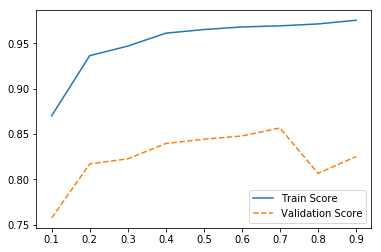

In [22]:
plt.plot(para_lr,train_score,linestyle="-",label="Train Score")
plt.plot(para_lr,validation_score,linestyle="--",label="Validation Score")
plt.legend()

- learning_rate = 0.7 적절

# 결론도출

### 최종모델 생성

In [23]:
gb_final = GradientBoostingRegressor(random_state=1234,n_estimators=20,min_samples_leaf=9,min_samples_split=32,max_depth=4)
gb_final.fit(df_train_x,df_train_y)
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x,df_test_y)))

Score on training set: 0.870
Score on test set: 0.804


### 설명변수의 중요도

In [24]:
v_feature_names=df_train_x.columns

df_importance=pd.DataFrame()
df_importance["Feature"]=v_feature_names
df_importance["Importance"]=gb_final.feature_importances_

df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
7,AGE,0.357
0,CEMENT,0.310
3,WATER,0.202
1,BLAST_FURNACE_SLAG,0.066
6,FINE_AGGREGATE,0.026
4,SUPERPLASTICIZER,0.024
5,COARSE_AGGREGATE,0.007
2,FLY_ASH,0.007


### 설명변수 중요도 그래프

Text(0, 0.5, '변수')

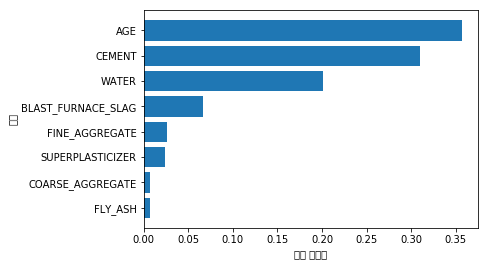

In [25]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

- AGE 가 가장 유의한 변수로 확인됨

In [ ]:
estimator = GradientBoostingRegressor()

param_grid={"criterion":["mse","friedman_mse","mae"],"max_features":["auto","sqrt","log2"],"max_depth":para_depth,"min_samples_split":para_split,"min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator,param_grid,scoring="r2",n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter:\n{}".format(grid_dt.best_params_))
print("\nbest score:\n{}".format(grid_dt.best_score_.round(3)))


c:\users\cross\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [26]:
pred = gb_final.predict(df_test_x)
print(pred)

[22.91012807 17.55026378 49.98728315 23.05458825 39.63663724 47.21543181
 31.76908557 35.94702854 38.51659994 59.43542744 13.78310973 26.02909162
 44.25822008 32.21816107 42.07726422 37.05068365 30.34155654 24.99600229
 31.8822608  13.39219351 37.1235488  29.44863815 34.94065841 29.42211931
 45.81080454 35.39558289 32.34400632 30.50975892 29.27681993 29.94242035
 41.70741231 30.50408745 38.25030108 45.59513367 42.39302078 26.03610622
 21.51343927 34.94065841 22.91012807 33.28779952 17.14495485 44.10598094
 35.98898097 21.29878395 31.76908557 30.02312047 34.94065841 26.67158678
 45.05201227 24.56816435 43.98753389 26.5401986  50.12008873 46.10571228
 50.62540636 56.11073466 36.90096546 44.43305873 33.67123713 34.09102181
 59.79447572 22.5175505  44.98913476 16.69991193 38.90079743 35.54455831
 67.13344286 58.14311172 29.98478663 42.04161936 37.60300249 20.87214703
 41.80983654 32.97995039 44.62148258 55.40976467 24.56816435 23.4643747
 32.34400632 60.7424656  33.1368337  41.17971451 36.

In [27]:
mean_squared_error(df_test_y,pred,multioutput='raw_values')

array([50.9502095])

In [28]:
mean_absolute_error(df_test_y,pred,multioutput='raw_values')

array([5.83088387])